<a href="https://colab.research.google.com/github/sreyan-ghosh/ml_revision/blob/master/tinkering_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Concepts of OpenCV
Tinkering and creating mini utilities.

## Setup
Cloning into a repo that contains the files we are going to deal with during the course of this endeavour.

In [2]:
!git clone https://github.com/misbah4064/opencvTutorial
%cd opencvTutorial/
from IPython.display import clear_output
clear_output()

In [3]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

## OpenCV Basics - Changing Color Profiles of Images

In [3]:
# RGB image containing 3 channels
image = cv2.imread('./images/color.jpg')
# cv2_imshow(image)
print(image.shape)

# Grayscale image containing just 1 channel
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# cv2_imshow(gray)
print(gray.shape)

# HSV image - Hue, Saturation, Variance
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# cv2_imshow(hsv)
print(hsv.shape)

# Why HSV?
# The HSV format stands for Hue Saturation Value. In this format, we 
# do not have to scourge through all the 3 channels in RGB to get the 
# color information of the image, in HSV, it is all stored in the first
# channel or the Hue channel. This makes the information stored in H all 
# we need for dealing with color images.

(476, 640, 3)
(476, 640)
(476, 640, 3)


## Basics of OpenCV - Edge Detection

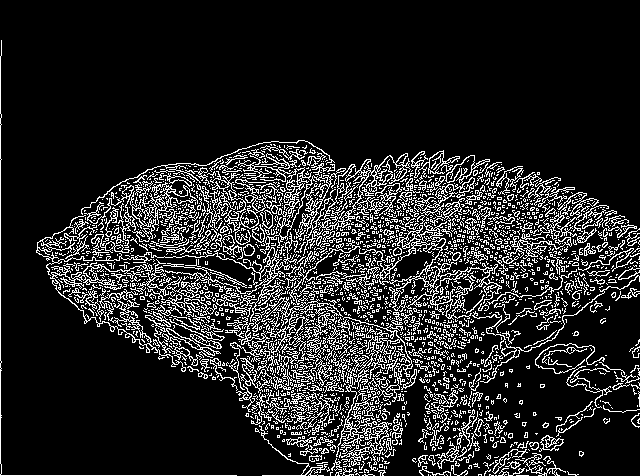

In [4]:
# Canny Edge Detection
# This is a kind of edge detection that only works on GRAY images.

canny_img = cv2.Canny(gray, 100, 100)
# cv2_imshow(canny_img)
# This algorithm gives all the edges in the image depending on the filter size.

# Using OTSU method, choosing the perfect size for the filter
upper_thresh, thresh_im = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
lower_thresh = 0.5*upper_thresh;
canny_img = cv2.Canny(gray, lower_thresh, upper_thresh)
cv2_imshow(canny_img)

### Erosion and Dilation
Eroding an image refers to removing noise from it using a filter. Depending on the filter size information is removed from the image. 
Dilation is the opposite of erosion. It amplifies the data stored in an image.

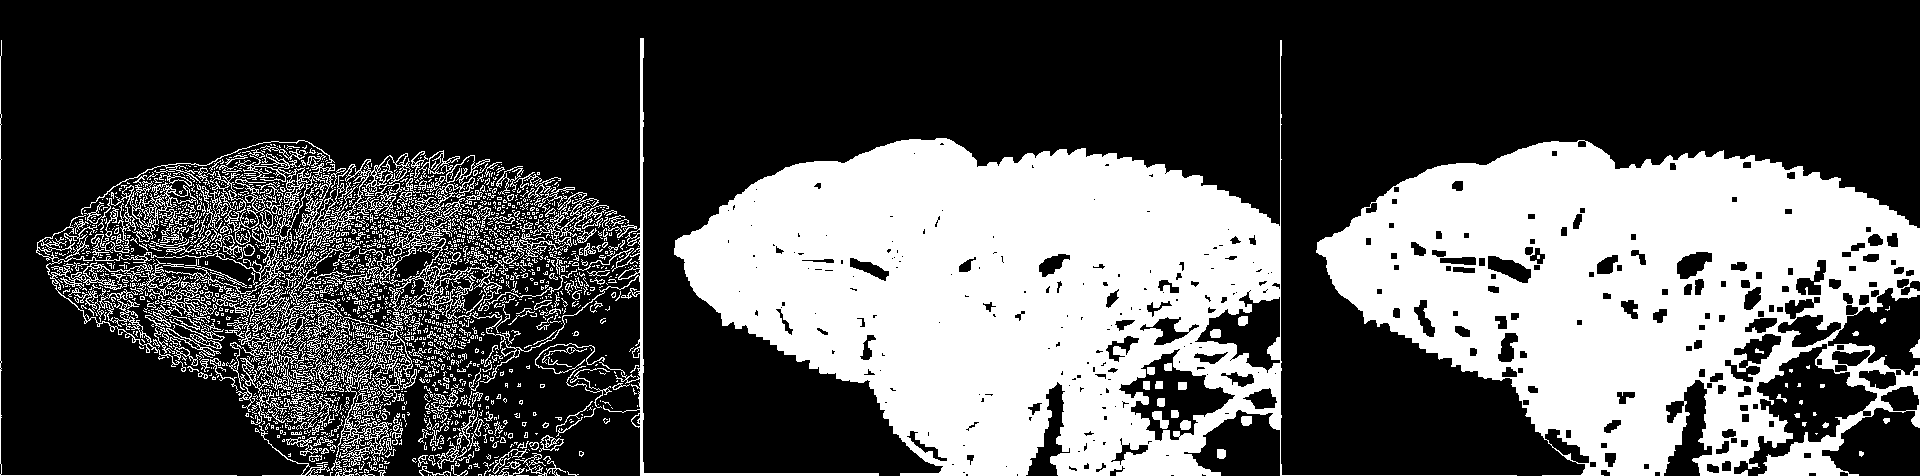

In [5]:
# setting the kernel size
kernel = np.ones((5,5), np.uint8)

# Dilation
dilated_img = cv2.dilate(canny_img, kernel, iterations=1)
# cv2_imshow(dilated_img)

# Erosion
eroded_img = cv2.erode(dilated_img, kernel, iterations=1)
# cv2_imshow(eroded_img)

disp_img = np.hstack((canny_img, dilated_img, eroded_img))
cv2_imshow(disp_img)

# Edge detection is used in real-life in lane detection.

## Basics of OpenCV - Removing Noise from an Image

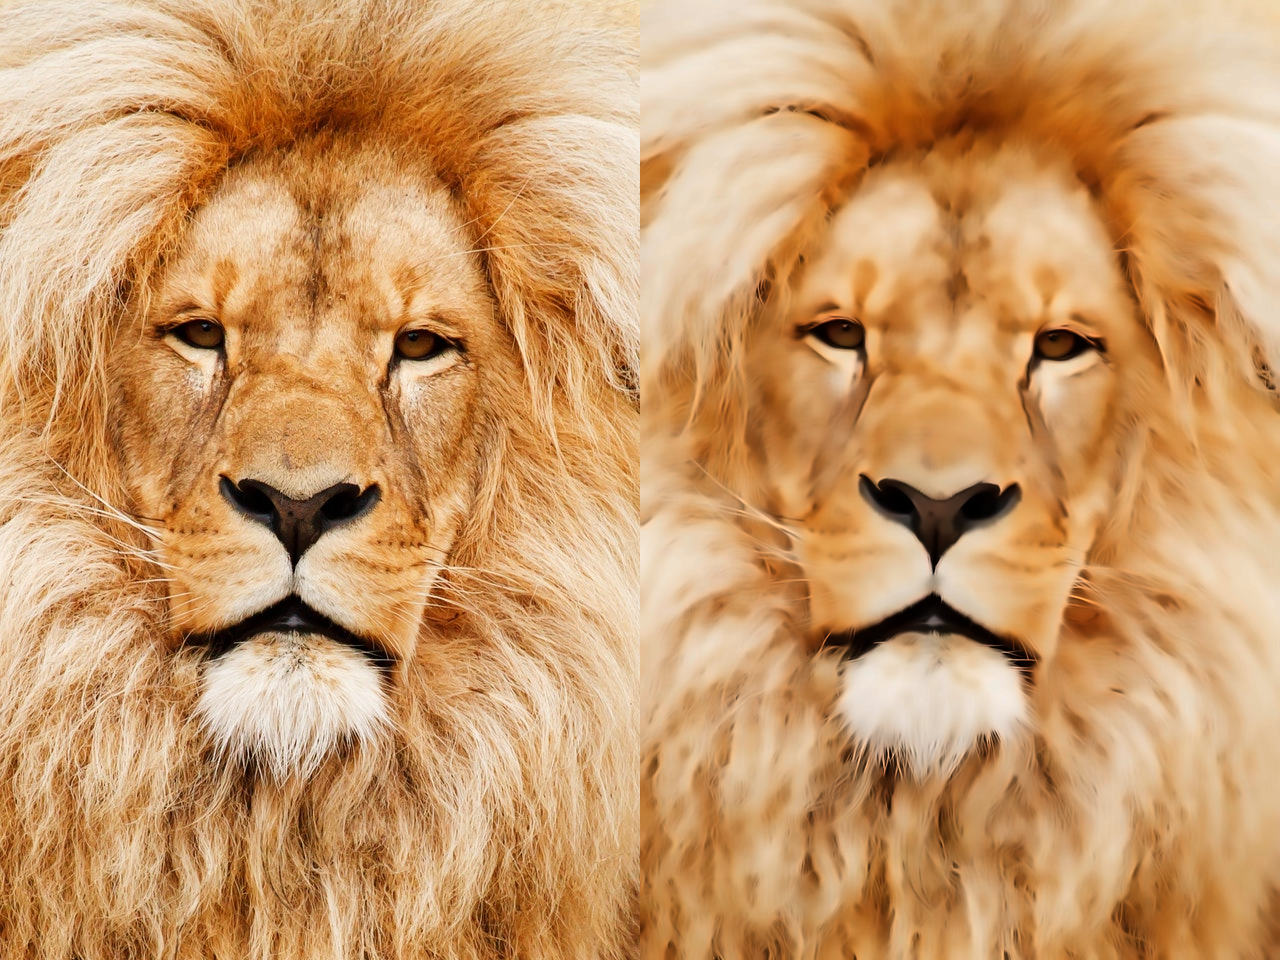

In [6]:
image = cv2.imread("images/lion.jpg")
# cv2_imshow(image)

denoised_img = cv2.fastNlMeansDenoisingColored(image, None, 20, 20 , 7, 15)
# https://docs.opencv.org/master/d1/d79/group__photo__denoise.html#ga21abc1c8b0e15f78cd3eff672cb6c476

disp_img = np.hstack((image, denoised_img))
cv2_imshow(disp_img)

## Basics of OpenCV - Drawing and Writing on an image

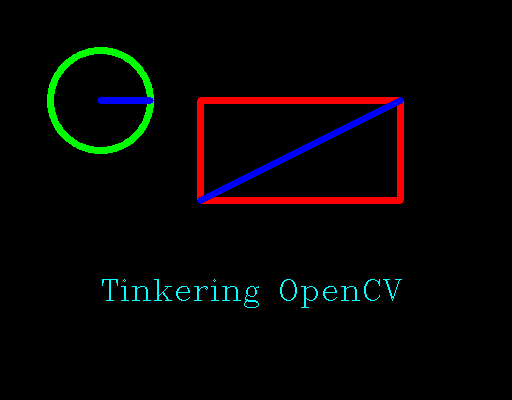

In [7]:
# creating an all black image
img = np.zeros((400,512,3), np.uint8)

# Drawing a circle
cv2.circle(img, (100,100), 50, (0,255,0), 5)

# Drawing a rectangle
cv2.rectangle(img, (200, 100), (400, 200), (0,0,255), 5)

# Drawing a line
cv2.line(img, (100, 100), (150,100), (255,0,0), 5)
cv2.line(img, (200, 200), (400,100), (255,0,0), 5)

# Writing text
cv2.putText(img, "Tinkering OpenCV", (100, 300), cv2.FONT_HERSHEY_COMPLEX, 1, (255,255,0))

cv2_imshow(img)

## Intermediate OpenCV - Color Detection

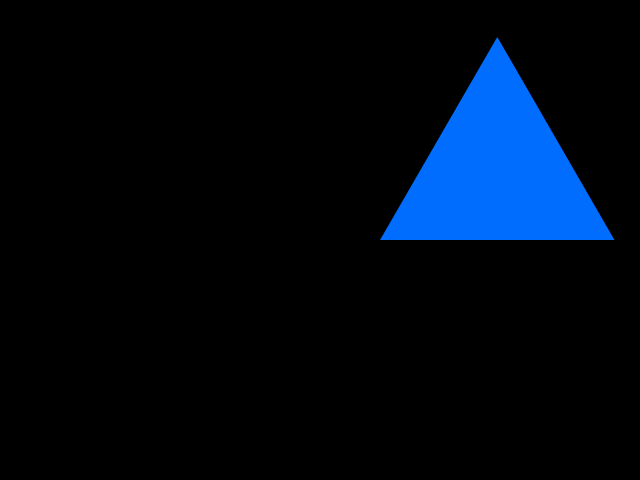

In [8]:
image = cv2.imread("images/shapes.png")
# cv2_imshow(image)

# Converting to HSV format for easier manipulation
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Extracting the required mask color
lower_hue = np.array([65,0,0])
upper_hue = np.array([110,255,255])
# Here we have used hue values between (65,110) that is for blue.
# The other values are:
# Red: (0,20)
# Green: (46,91)
# Yellow: (21,45)

# Creating a mask that allows only the required color
mask = cv2.inRange(hsv, lower_hue, upper_hue)
# cv2_imshow(mask)
result = cv2.bitwise_and(image, image, mask=mask)
cv2_imshow(result)

## Intermediate OpenCV - Face Detection

Here, in face detection we use a Cascade Classifier. We can obviously use better Caffe models to do it but this is how it is. The `CascadeClassifier` is a class that is assigned to our variable `face_cascade` on which we called the method `detectMultiScale`. This returns a list containing lists of 4 coordinates. The coordinate of the top left corner and the height and width of the box.

In [ ]:
face_cascade = cv2.CascadeClassifier('./files/haarcascade_frontalface_default.xml')
image = cv2.imread('./images/person.jpg')
# image = cv2.imread('./images/group.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.5, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)

cv2_imshow(image)

The following code block is from Colab with a minor modification to detect faces in real time from our physical webcam. The code is lengthy of course and has some inline JavaScript but again, it is what it is. :)

In [19]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='../photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  jpg_from_buf = np.frombuffer(binary, dtype=np.uint8)
  image = cv2.imdecode(jpg_from_buf, flags=1)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  faces = face_cascade.detectMultiScale(gray, 1.5, 3)
  for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)
  cv2.imwrite(filename, image)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


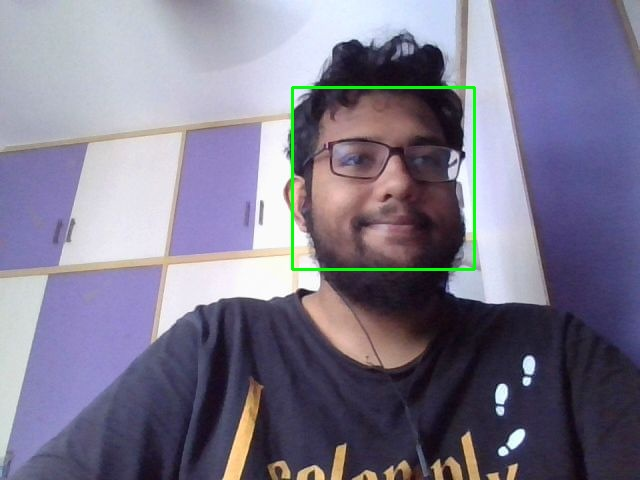

In [20]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

## Intermediate OpenCV - Shape Detection

For shape detection, the methods are crude but effective. We take an image and convert it into grayscale before thresholding it such that the individual figures in question become distinct. Then we run a contours function `cv2.findContours` that gives us the points that make up the figures. Now for every set of points we get we run an approximation function which returns the minimum number of points required to draw that contour again. Refer to this for more information on `cv2.approxPolyDP`: https://docs.opencv.org/master/d3/dc0/group__imgproc__shape.html#ga0012a5fdaea70b8a9970165d98722b4c

After getting the coords of the points that are essential in the recconstruction of the figures, we take the length of the coord lists and tag the figures from existing knowledge of shapes. Then we use `cv2.drawContours` to redraw an outline on the shapes present in the original image.

This is a quadrilateral
This is a hexagon
This is a triangle
This is a circle
This is a quadrilateral


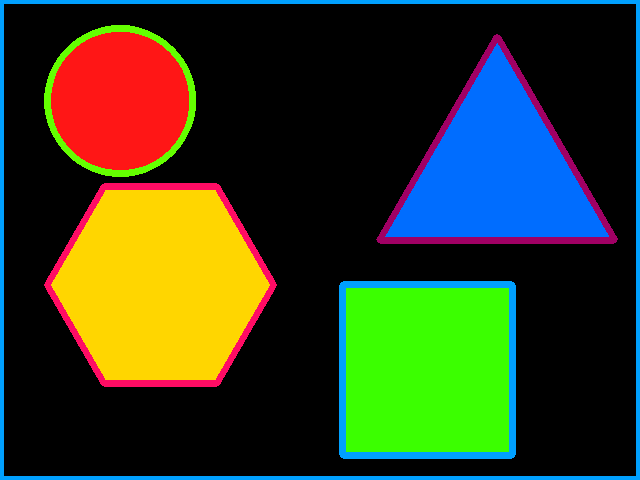

In [31]:
image = cv2.imread('./images/shapes.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY_INV)
contours, h = cv2.findContours(thresh, 1, 2)

for cont in contours:
    approx = cv2.approxPolyDP(cont, 0.01*cv2.arcLength(cont, True), True)
    n = len(approx)
    if n==4:
        print("This is a quadrilateral")
        cv2.drawContours(image, [cont], 0, (255,160,0), 5)
    elif n==6:
        print("This is a hexagon")
        cv2.drawContours(image, [cont], 0, (100,12,255), 5)
    elif n==3:
        print("This is a triangle")
        cv2.drawContours(image, [cont], 0, (100,0,160), 5)
    elif n>10:
        print("This is a circle")
        cv2.drawContours(image, [cont], 0, (0,255,100), 5)

cv2_imshow(image)

## Expert OpenCV - Ball Tracking

In [32]:
cap = cv2.VideoCapture('videos/video.mp4')
ball = []
output = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 25, (1920,1080))

while cap.isOpened():
    stat, frame = cap.read()
    if stat is False:
        break
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_hue = np.array([21,0,0])
    upper_hue = np.array([45,255,255])
    mask = cv2.inRange(hsv, lower_hue, upper_hue)

    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    center = None

    if len(contours) > 0:
        c = max(contours, key = cv2.contourArea)
        (x,y), radius = cv2.minEnclosingCircle(c)
        moment = cv2.moments(c)
        try:
            center = (int (moment["m10"]/moment["m00"]), int (moment["m01"]/moment["m00"]))
            cv2.circle(frame, center, 10, (255,0,0), -1)
            ball.append(center)
        except:
            pass
        if len(ball) > 2:
            for i in range(1, len(ball)):
                cv2.line(frame, ball[i-1], ball[i],(0,0,255), 2)
    output.write(frame)
output.release()

## Final Project - Facial Recognition

In [4]:
%cd /content/
!git clone https://github.com/misbah4064/face_recognition.git
!pip install face_recognition
%cd face_recognition
clear_output()

In [6]:
import face_recognition as fr
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [14]:
# creating encoding profiles
face_1 = fr.load_image_file("elon.jpg")
face_1_enco = fr.face_encodings(face_1)[0]

face_2 = fr.load_image_file("Donald Trump.jpg")
face_2_enco = fr.face_encodings(face_2)[0]

face_3 = fr.load_image_file("jeffbezos.jpg")
face_3_enco = fr.face_encodings(face_3)[0]

face_4 = fr.load_image_file("ertugrul.jpeg")
face_4_enco = fr.face_encodings(face_4)[0]

known_face_enco = [
                   face_1_enco,
                   face_2_enco,
                   face_3_enco,
                   face_4_enco
]

known_face_names = [
                    "Elon Musk",
                    "Donald Trump",
                    "Jeff Bezos",
                    "Ertugrul"
]

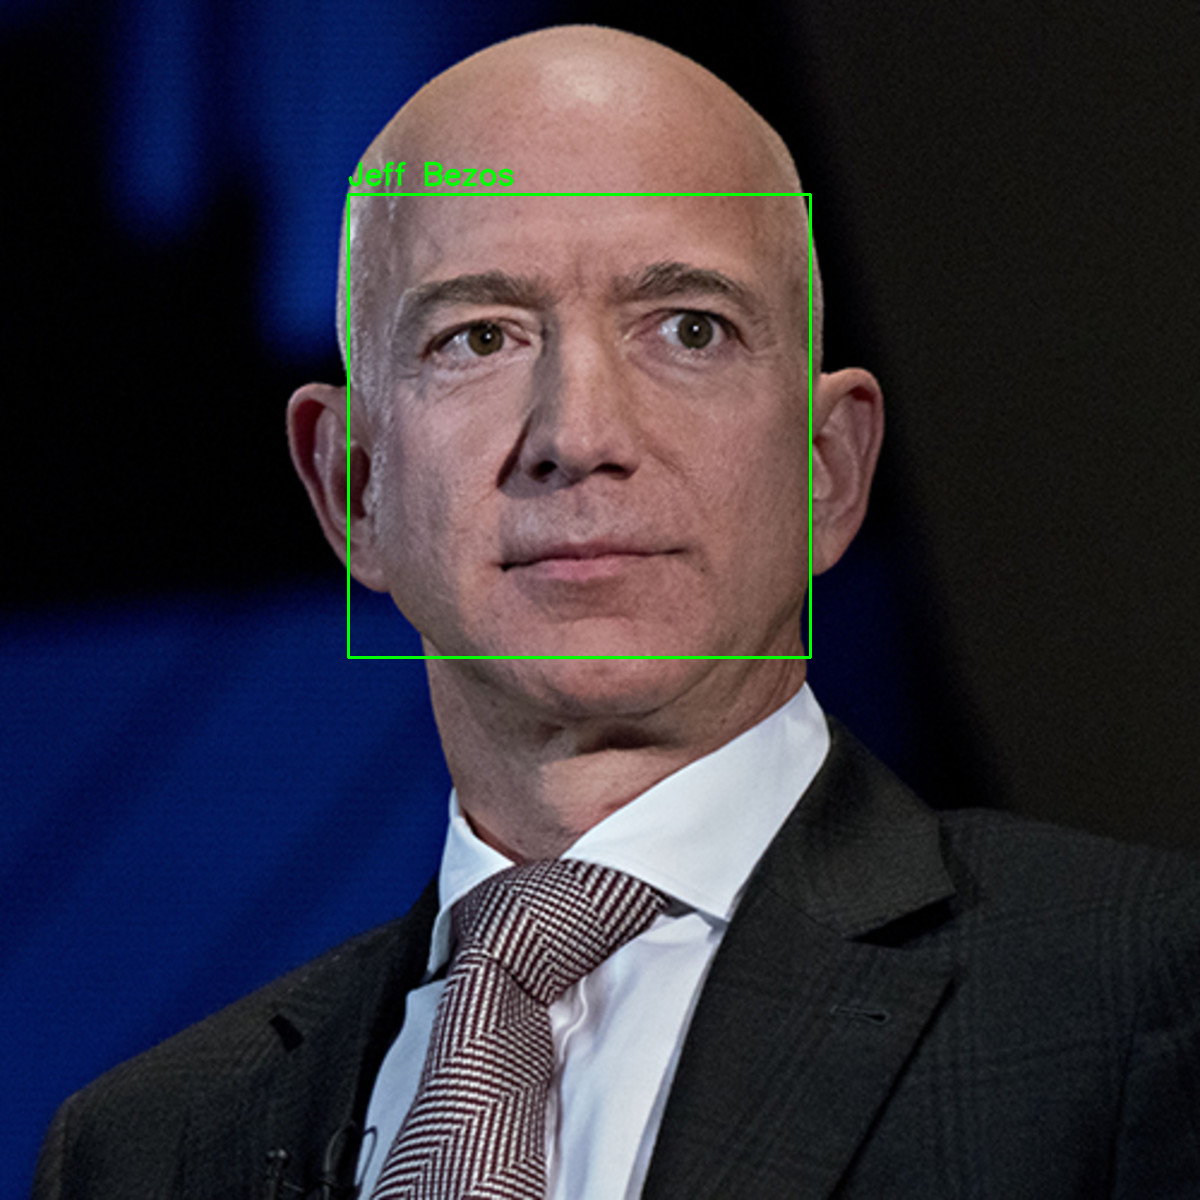

In [17]:
file_name = "unknown_je.jpg"
unknown_image = fr.load_image_file(file_name)
image = cv2.imread(file_name)

face_locations = fr.face_locations(unknown_image)
face_encodings = fr.face_encodings(unknown_image, face_locations)

for (top,right,bottom,left), face_enco in zip(face_locations, face_encodings):
    matches = fr.compare_faces(known_face_enco, face_enco)

    name = "Unknown"

    face_distances = fr.face_distance(known_face_enco, face_enco)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]
    cv2.rectangle(image, (left, top), (right, bottom), (0,255,0), 2)
    cv2.putText(image, name, (left, top-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2, cv2.LINE_AA)

cv2_imshow(image)